In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer




In [2]:
# Load the datasets
fake_df = pd.read_csv('/kaggle/input/fake-news-dataset/Fake.csv')#[['text', 'label']]
true_df = pd.read_csv('/kaggle/input/fake-news-dataset/True.csv')#[['text', 'label']]

# Add 'label' column and assign values
fake_df['label'] = 0  # 0 for fake news
true_df['label'] = 1  # 1 for true news

# Select only the 'text' and 'label' columns
fake_df = fake_df[['text', 'label']]
true_df = true_df[['text', 'label']]

# Combine the datasets
combined_df = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the combined dataset
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

In [3]:
print(combined_df.shape)
combined_df.head()

(44898, 2)


,text,label
0,WASHINGTON (Reuters) - President Barack Obama ...,1
1,21st Century Wire asks HAVE YOUR SHOUT: With ...,0
2,RIYADH (Reuters) - Saudi Arabia has agreed to ...,1
3,The London terror attack was a horrific scene ...,0
4,BUENOS AIRES (Reuters) - U.S. President Barack...,1


In [4]:
# Shuffle the combined dataset
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
print(combined_df.shape)
combined_df.head()

(44898, 2)


,text,label
0,"TAPA, Estonia (Reuters) - Britain will remain ...",1
1,"WASHINGTON (Reuters) - Since mid-2016, U.S. Ho...",1
2,BUDAPEST (Reuters) - Hungary s right-wing Prim...,1
3,The Trump administration had proposed $1 billi...,0
4,WASHINGTON (Reuters) - U.S. lawmakers signaled...,1


In [5]:
initial_data = combined_df.copy() # copy for adding synthetic data in  it

In [6]:

label_counts = combined_df['label'].value_counts()

# Print the counts
print("Number of rows for label 0:", label_counts[0])
print("Number of rows for label 1:", label_counts[1])
difference = label_counts[0] - label_counts[1]
print("the difference of rows:",difference)

Number of rows for label 0: 23481
Number of rows for label 1: 21417
the difference of rows: 2064


> so we have to crerate 2064 new ros of label 1 to balance the dataset

In [8]:
# Check for null values
null_counts = combined_df.isnull().sum()
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
text     0
label    0
dtype: int64


# Label Visualization

0 for Fake and 1 for true: label
0    52.298543
1    47.701457
Name: count, dtype: float64


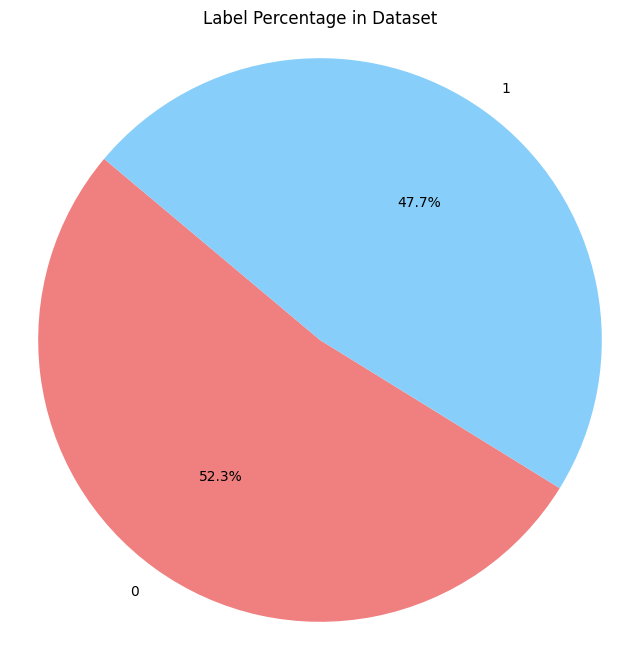

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate percentage of each label
label_counts = combined_df['label'].value_counts()
label_percentages = label_counts / label_counts.sum() * 100
print("0 for Fake and 1 for true:",label_percentages)
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Label Percentage in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Sampling
so that what sample e choose wr get same proportion 

In [8]:
import pandas as pd

# Assuming combine_df is your dataset and already loaded

# Calculate the percentage of each label
label_percentages = combined_df['label'].value_counts(normalize=True) * 100
print(label_percentages)

# Define the total number of samples you want
total_samples = 2500  # Change this to your desired number of samples

# Calculate the number of samples for each label
num_label_0_samples = int(total_samples * (label_percentages[0] / 100))
num_label_1_samples = total_samples - num_label_0_samples

# Sample the required number of 0 and 1 labels
label_0_samples = combined_df[combined_df['label'] == 0].sample(num_label_0_samples, random_state=42)
label_1_samples = combined_df[combined_df['label'] == 1].sample(num_label_1_samples, random_state=42)

# Concatenate the samples to create the final dataset
sampled_data = pd.concat([label_0_samples, label_1_samples]).reset_index(drop=True)

# Verify the new dataset
print(sampled_data['label'].value_counts(normalize=True) * 100)

# Now you can proceed with further analysis or machine learning tasks on the sampled_data


label
0    52.298543
1    47.701457
Name: proportion, dtype: float64
label
0    52.28
1    47.72
Name: proportion, dtype: float64


In [9]:
# Shuffle the combined dataset
combined_df = sampled_data.sample(frac=1).reset_index(drop=True)
print(combined_df.shape)
combined_df.head(50)

(2500, 2)


,text,label
0,Wisconsin s right-to-work law was determined...,0
1,Donald Trump hasn t even been president for a ...,0
2,UNITED NATIONS (Reuters) - Brazilian President...,1
3,Just take this chemotherapy sweetie..the gover...,0
4,PARIS (Reuters) - France will discuss the poss...,1
5,MANILA (Reuters) - The Philippines military c...,1
6,Hillary Clinton is the last person you want pl...,0
7,TOKYO (Reuters) - Japan will propose changes t...,1
8,ISTANBUL (Reuters) - Turkish prosecutors have ...,1
9,"Welcome to the new America, where there can ...",0


In [10]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

#
# Download NLTK stop words (if not already done)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens to form cleaned text
    cleaned_text = ' '.join(tokens)
    return tokens, cleaned_text

# Apply preprocessing to the text data
combined_df[['tokens', 'cleaned_text']] = combined_df['text'].apply(lambda x: pd.Series(preprocess_text(x)))



2024-06-14 09:15:46.471749: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 09:15:46.471841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 09:15:46.628481: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
combined_df.shape

(2500, 4)

# Model applying before text generation

In [12]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(combined_df['cleaned_text']).toarray()

# Encode labels from combined_df_subset
encoder = LabelEncoder()
y = encoder.fit_transform(combined_df['label'])

# Split data into training and testing sets with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
 #Initialize and train AdaBoost classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Cross-validate the model to check for overfitting
cv_scores = cross_val_score(ada, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

# Predictions and evaluation
y_pred = ada.predict(X_test)
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred))

# Check the distribution of the target variable in training and test sets
print("Training set class distribution:\n", np.bincount(y_train))
print("Test set class distribution:\n", np.bincount(y_test))

Cross-Validation Scores: [0.985  0.99   0.9975 1.     0.99  ]
Mean Cross-Validation Score: 0.9925
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       247

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Training set class distribution:
 [1054  946]
Test set class distribution:
 [253 247]


In [17]:
# GBM
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train GBM classifier
gbm = GradientBoostingClassifier(n_estimators=100)
gbm.fit(X_train, y_train)

# Predictions and evaluation
y_pred = gbm.predict(X_test)
print("GBM Classification Report:\n", classification_report(y_test, y_pred))


GBM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       247

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [18]:
# XGBM
import xgboost as xgb

# Initialize and train XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       253
           1       1.00      0.99      0.99       247

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



In [19]:
# CNN 4 layers
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Tokenizing and padding sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(combined_df['text'])
X_seq = tokenizer.texts_to_sequences(combined_df['text'])
X_pad = pad_sequences(X_seq, maxlen=100)

# Train-test split for CNN
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Build 4-layer CNN model
model_4 = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_4.summary()

# Train the model
model_4.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f'4-Layer CNN Accuracy: {accuracy}')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6154 - loss: 0.6457

I0000 00:00:1718357093.177184     143 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718357093.196021     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718357093.793331     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6357 - loss: 0.6223 - val_accuracy: 0.9700 - val_loss: 0.0986
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0409 - val_accuracy: 0.9675 - val_loss: 0.0699
Epoch 3/5


W0000 00:00:1718357094.195152     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9775 - val_loss: 0.0532
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.2236e-04 - val_accuracy: 0.9825 - val_loss: 0.0461
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.8609e-04 - val_accuracy: 0.9825 - val_loss: 0.0466
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9778 - loss: 0.0724
4-Layer CNN Accuracy: 0.9800000190734863


In [20]:
# CNN 6 layers
# Build 6-layer CNN model
model_6 = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_6.summary()

# Train the model
model_6.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f'6-Layer CNN Accuracy: {accuracy}')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
40/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5437 - loss: 0.6895

W0000 00:00:1718357099.984168     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718357100.648653     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5504 - loss: 0.6860 - val_accuracy: 0.9025 - val_loss: 0.3976
Epoch 2/5
39/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9067 - loss: 0.2656

W0000 00:00:1718357101.168146     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9120 - loss: 0.2448 - val_accuracy: 0.9500 - val_loss: 0.1430
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9980 - loss: 0.0206 - val_accuracy: 0.9700 - val_loss: 0.0836
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9725 - val_loss: 0.0895
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.2784e-04 - val_accuracy: 0.9750 - val_loss: 0.0842
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9705 - loss: 0.1656
6-Layer CNN Accuracy: 0.972000002861023


W0000 00:00:1718357102.541864     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Text GAN


In [21]:
combined_df.head()

,text,label,tokens,cleaned_text
0,Wisconsin s right-to-work law was determined...,0,"[wisconsin, righttowork, law, determined, unco...",wisconsin righttowork law determined unconstit...
1,Donald Trump hasn t even been president for a ...,0,"[donald, trump, even, president, month, alread...",donald trump even president month already amer...
2,UNITED NATIONS (Reuters) - Brazilian President...,1,"[united, nations, reuters, brazilian, presiden...",united nations reuters brazilian president mic...
3,Just take this chemotherapy sweetie..the gover...,0,"[take, chemotherapy, sweetiethe, government, k...",take chemotherapy sweetiethe government knows ...
4,PARIS (Reuters) - France will discuss the poss...,1,"[paris, reuters, france, discuss, possible, sa...",paris reuters france discuss possible sale raf...


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, Reshape, LSTM, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'combined_df' is already defined and contains the 'tokens' and 'label' columns.

# Tokenization and padding sequences
all_tokens = [token for sublist in combined_df['tokens'] for token in sublist]
vocab = list(set(all_tokens))
token_to_id = {token: idx for idx, token in enumerate(vocab)}
combined_df['token_ids'] = combined_df['tokens'].apply(lambda tokens: [token_to_id[token] for token in tokens])
max_sequence_length = max([len(token_ids) for token_ids in combined_df['token_ids']])
padded_sequences = pad_sequences(combined_df['token_ids'], maxlen=max_sequence_length, padding='post')

# Preparing data for GAN
data = pd.DataFrame(padded_sequences)
data['label'] = combined_df['label'].astype(int)

for column in data.columns:
    if column != 'label':
        data[column] = data[column].astype(float)

data.columns = data.columns.astype(str)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_tensor = tf.convert_to_tensor(data_scaled, dtype=tf.float32)
label_tensor = tf.convert_to_tensor(data['label'].values, dtype=tf.float32)
dataset = tf.data.Dataset.from_tensor_slices((data_tensor, label_tensor)).shuffle(buffer_size=1024).batch(32)

# Define generator and discriminator
latent_dim = 100  # Example value, adjust according to your setup
output_dim = data_tensor.shape[1]  # Adjust to match the padded sequence length

generator = Sequential([
    Input(shape=(latent_dim,)),
    Dense(256),
    BatchNormalization(momentum=0.8),
    LeakyReLU(negative_slope=0.2),
    Reshape((1, 256)),
    LSTM(256, return_sequences=True),
    Flatten(),
    Dense(output_dim, activation='tanh')  # Output shape is (None, output_dim)
])

discriminator = Sequential([
    Input(shape=(output_dim,)),  # Input shape is (None, output_dim)
    Dense(256),
    LeakyReLU(negative_slope=0.2),
    BatchNormalization(momentum=0.8),
    Reshape((1, 256)),
    LSTM(256, return_sequences=True),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the discriminator separately
discriminator_optimizer = Adam(learning_rate=0.0002)
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the GAN and compile it
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = Model(gan_input, gan_output)
gan_optimizer = Adam(learning_rate=0.0002)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

# Training the GAN
epochs = 100  # Increased epochs for better training
batch_size = 32

for epoch in range(epochs):
    for real_data, _ in dataset:
        current_batch_size = real_data.shape[0]

        # Reshape real_data to match the expected input shape of the discriminator
        real_data = tf.reshape(real_data, (current_batch_size, output_dim))

        # Train Discriminator
        discriminator.trainable = True
        real_labels = tf.ones((current_batch_size, 1))
        fake_labels = tf.zeros((current_batch_size, 1))

        z = tf.random.normal((current_batch_size, latent_dim))
        fake_data = generator(z)
        
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        discriminator.trainable = False

        # Train Generator
        z = tf.random.normal((current_batch_size, latent_dim))
        g_loss = gan.train_on_batch(z, real_labels)  # Train generator to generate real-like samples

    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{epochs}], d_loss: {d_loss[0]:.4f}, g_loss: {g_loss:.4f}')

Epoch [1/100], d_loss: 0.2594, g_loss: 0.5140


In [24]:

# Function to generate synthetic data with desired labels
def generate_synthetic_data(generator, num_samples, latent_dim=100, output_dim=846):
    z = tf.random.normal((num_samples, latent_dim))
    synthetic_data = generator(z).numpy()
    
    # Reshape synthetic_data to remove the extra dimension if present
    synthetic_data = synthetic_data.reshape(num_samples, output_dim)
    
    # Assuming scaler is defined somewhere appropriately
    synthetic_data = scaler.inverse_transform(synthetic_data)
    
    # Create DataFrame from synthetic data
    synthetic_df = pd.DataFrame(synthetic_data, columns=range(output_dim))
    synthetic_df['label'] = 1  # Assuming desired label is 1
    
    return synthetic_df

# Generate 50 rows of data labeled 1
desired_label = 1
num_samples = 50
synthetic_data_df = generate_synthetic_data(generator, num_samples)

# Display the generated data
print(synthetic_data_df.head())


Shape of synthetic data before reshaping: (50, 1, 4614)
Shape of synthetic data after reshaping: (50, 4614)
          0         1         2         3         4         5         6  \
0  0.969226  0.316040  0.949075  0.243898  0.939046  0.970625  0.040232   
1  0.964851  0.323910  0.944632  0.247980  0.934891  0.965592  0.044519   
2  0.976606  0.297365  0.958899  0.222678  0.952869  0.977642  0.030761   
3  0.966359  0.321150  0.944806  0.246907  0.936274  0.967673  0.044395   
4  0.968919  0.316396  0.948652  0.244663  0.941774  0.970095  0.040947   

          7         8         9  ...       837       838       839       840  \
0  0.976250  0.894487  0.230326  ...  0.927835  0.950431  0.931968  0.923938   
1  0.972714  0.886428  0.238361  ...  0.922633  0.945315  0.926402  0.918546   
2  0.982540  0.911090  0.213421  ...  0.941545  0.959679  0.944255  0.937148   
3  0.974452  0.889766  0.236666  ...  0.924160  0.947193  0.927288  0.918379   
4  0.975493  0.892723  0.227077  ...  0.9

In [25]:
# Reconstruct the token_to_id dictionary
all_tokens = [token for sublist in combined_df['tokens'] for token in sublist]
vocab = list(set(all_tokens))
token_to_id = {token: idx for idx, token in enumerate(vocab)}
id_to_token = {idx: token for token, idx in token_to_id.items()}

# Remove padding
def remove_padding(sequence, pad_value=0):
    return [int(token_id) for token_id in sequence if token_id != pad_value]

synthetic_sequences = [remove_padding(seq) for seq in synthetic_data_df.drop(columns='label').values]

# Convert token IDs back to tokens
def ids_to_tokens(ids, id_to_token):
    return [id_to_token[int(id)] for id in ids if int(id) in id_to_token]

synthetic_texts = [ids_to_tokens(seq, id_to_token) for seq in synthetic_sequences]

# Join tokens to form text
def tokens_to_text(tokens):
    return ' '.join(tokens)

synthetic_texts = [tokens_to_text(tokens) for tokens in synthetic_texts]

# Display the generated texts
for i, text in enumerate(synthetic_texts):
    print(f"Synthetic Text {i+1}: {text}\n")


Synthetic Text 1: hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwon hankwo

# Applyinng Models After Generating texts 

In [ ]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# Initialize and train AdaBoost classifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ada.predict(X_test)
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# GBM
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train GBM classifier
gbm = GradientBoostingClassifier(n_estimators=100)
gbm.fit(X_train, y_train)

# Predictions and evaluation
y_pred = gbm.predict(X_test)
print("GBM Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# XGBM
import xgboost as xgb

# Initialize and train XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# CNN 4 layers
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Tokenizing and padding sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])
X_seq = tokenizer.texts_to_sequences(df['text'])
X_pad = pad_sequences(X_seq, maxlen=100)

# Train-test split for CNN
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Build 4-layer CNN model
model_4 = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_4.summary()

# Train the model
model_4.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f'4-Layer CNN Accuracy: {accuracy}')


In [ ]:
# CNN 6 layers
# Build 6-layer CNN model
model_6 = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_6.summary()

# Train the model
model_6.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f'6-Layer CNN Accuracy: {accuracy}')
